# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from datetime import datetime
import copy

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | asau
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | miyaly
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | kokkola
Processing Record 9 of Set 1 | port saint john's
Processing Record 10 of Set 1 | lundazi
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ouellah
City not found. Skipping...
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | atafu village
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | vorgashor
Processing Record 17 of Set 1 | megion
Processing Record 18 of Set 1 | birobidzhan
Processing Record 19 of Set 1 | kharabali
Processing Record 20 of Set 1 | ngorongoro
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Se

Processing Record 39 of Set 4 | zhigalovo
Processing Record 40 of Set 4 | ulladulla
Processing Record 41 of Set 4 | kingston
Processing Record 42 of Set 4 | puerto baquerizo moreno
Processing Record 43 of Set 4 | hawaiian paradise park
Processing Record 44 of Set 4 | mulayjah
Processing Record 45 of Set 4 | searcy
Processing Record 46 of Set 4 | riberalta
Processing Record 47 of Set 4 | talakan
Processing Record 48 of Set 4 | el progreso
Processing Record 49 of Set 4 | tolanaro
Processing Record 0 of Set 5 | belvedere marittimo
Processing Record 1 of Set 5 | fort bragg
Processing Record 2 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | juan l. lacaze
Processing Record 5 of Set 5 | fisterra
Processing Record 6 of Set 5 | adrar
Processing Record 7 of Set 5 | mombetsu
Processing Record 8 of Set 5 | callao
Processing Record 9 of Set 5 | mahwah
Processing Record 10 of Set 5 | salalah
Processing Record 11 of Set 5 | 

City not found. Skipping...
Processing Record 27 of Set 8 | kampot
Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | maquoketa
Processing Record 31 of Set 8 | ponta delgada
Processing Record 32 of Set 8 | aswan
Processing Record 33 of Set 8 | kharkhorin
Processing Record 34 of Set 8 | filingue
Processing Record 35 of Set 8 | kirensk
Processing Record 36 of Set 8 | suva
Processing Record 37 of Set 8 | isfana
Processing Record 38 of Set 8 | uaboe
City not found. Skipping...
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | la passe
Processing Record 41 of Set 8 | levuka
Processing Record 42 of Set 8 | happy valley-goose bay
Processing Record 43 of Set 8 | candido de abreu
Processing Record 44 of Set 8 | wanganui
Processing Record 45 of Set 8 | uzgen
Processing Record 46 of Set 8 | yatou
Processing Record 47 of Set 8 | rockland
Processing Record 48 of Set 8 | ascheberg
Processing Record 49 of Set 8 | fort 

Processing Record 17 of Set 12 | goynuk
Processing Record 18 of Set 12 | lae
Processing Record 19 of Set 12 | gallivare
City not found. Skipping...
Processing Record 20 of Set 12 | east ballina
Processing Record 21 of Set 12 | misratah
Processing Record 22 of Set 12 | mendoza
Processing Record 23 of Set 12 | mount pearl
Processing Record 24 of Set 12 | sefwi wiawso
City not found. Skipping...
Processing Record 25 of Set 12 | miyazaki
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | taltal
Processing Record 28 of Set 12 | amga
Processing Record 29 of Set 12 | tromso
Processing Record 30 of Set 12 | mata-utu
Processing Record 31 of Set 12 | jinxiang
Processing Record 32 of Set 12 | krasnokamsk
Processing Record 33 of Set 12 | odienne
Processing Record 34 of Set 12 | laguna
Processing Record 35 of Set 12 | bokoro
Processing Record 36 of Set 12 | kataragama
City not found. Skipping...
Processing Record 37 of Set 12 | paracuru
Processing Record 38 of Set 12 | d

In [63]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [64]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,96,91,2.24,NZ,1698225718
1,port-aux-francais,-49.3500,70.2167,4.51,84,100,13.58,TF,1698225719
2,port mathurin,-19.6833,63.4167,24.72,80,12,7.01,MU,1698225719
3,asau,46.4333,26.4000,17.51,53,91,6.67,RO,1698225720
4,papatowai,-46.5619,169.4708,16.43,57,100,4.32,NZ,1698225720


In [65]:
# Define the directory name
output_directory = "output_data"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_directory):
    os.mkdir(output_directory)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [66]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,96,91,2.24,NZ,1698225718
1,port-aux-francais,-49.3500,70.2167,4.51,84,100,13.58,TF,1698225719
2,port mathurin,-19.6833,63.4167,24.72,80,12,7.01,MU,1698225719
3,asau,46.4333,26.4000,17.51,53,91,6.67,RO,1698225720
4,papatowai,-46.5619,169.4708,16.43,57,100,4.32,NZ,1698225720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

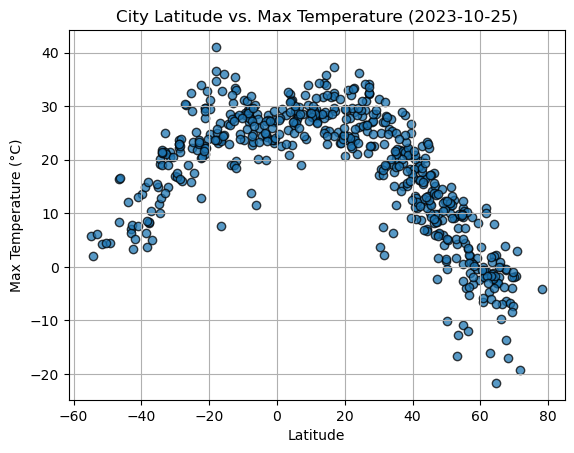

In [71]:
# Help displays date in the title without affecting original
format_city_data_df = copy.deepcopy(city_data_df)
format_city_data_df["Date"] = pd.to_datetime(format_city_data_df["Date"], unit='s')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties with the formatted date
title_date = format_city_data_df["Date"].iloc[0].strftime("%Y-%m-%d") 
plt.title(f"City Latitude vs. Max Temperature ({title_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

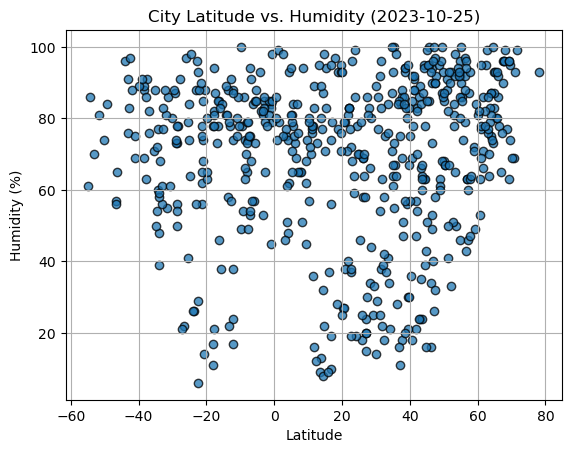

In [72]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({title_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

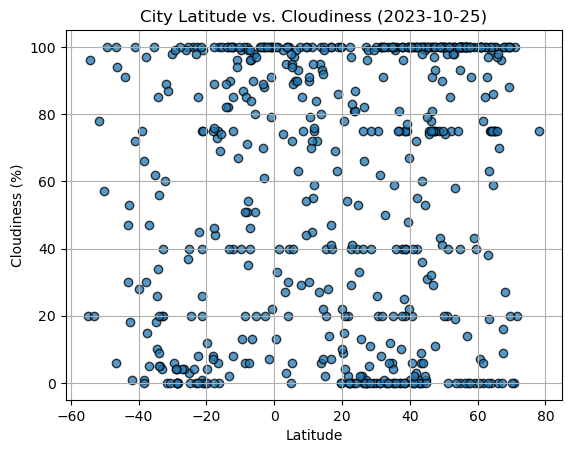

In [73]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({title_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

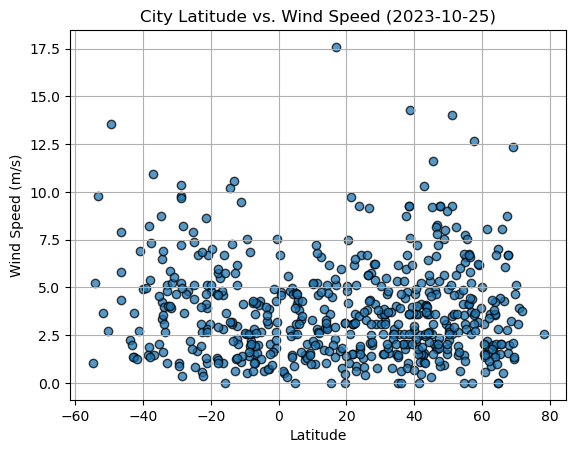

In [74]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({title_date})")  # Update the title as needed
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Create a scatter plot
    plt.scatter(x, y, marker="o", edgecolors="black", alpha=0.75)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Calculate the regression line
    regression_line = slope * x + intercept

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print the R-value
    r_text = f'The r-value is: {r_value}'
    print(r_text)

    # Plot the regression line
    plt.plot(x, regression_line, color='red', linestyle='-')

    # Display the linear regression formula on the plot
    regression_formula = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x), min(y), regression_formula, fontsize=12, color="red", ha="left", va="bottom")

    # Add the title
    plt.title(title)

    # Display the plot
    plt.show()

In [145]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,asau,46.4333,26.4000,17.51,53,91,6.67,RO,1698225720
5,miyaly,48.8844,53.7836,5.93,63,100,7.55,KZ,1698225721
6,thompson,55.7435,-97.8558,-3.91,74,100,4.12,CA,1698225721
7,kokkola,63.8385,23.1307,-1.15,87,0,1.54,FI,1698225722
10,bethel,41.3712,-73.4140,10.96,88,0,0.00,US,1698225724


In [146]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,96,91,2.24,NZ,1698225718
1,port-aux-francais,-49.3500,70.2167,4.51,84,100,13.58,TF,1698225719
2,port mathurin,-19.6833,63.4167,24.72,80,12,7.01,MU,1698225719
4,papatowai,-46.5619,169.4708,16.43,57,100,4.32,NZ,1698225720
8,port saint john's,-31.6229,29.5448,21.54,55,0,3.92,ZA,1698225723


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8666494460915588


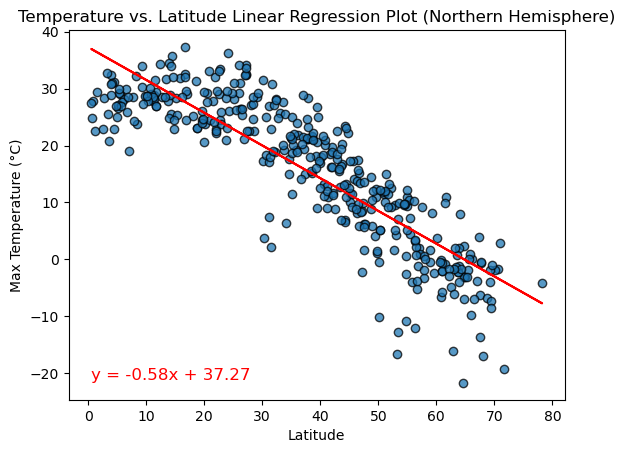

In [147]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Temperature vs. Latitude Linear Regression Plot (Northern Hemisphere)"
)

The r-value is: 0.7079203442829273


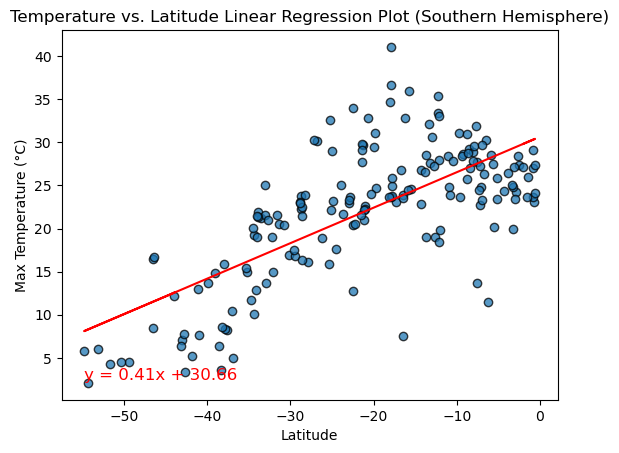

In [148]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],
    "Latitude",
    "Max Temperature (°C)",
    "Temperature vs. Latitude Linear Regression Plot (Southern Hemisphere)"
)

# Temperature vs. Latitude Linear Regression Plot Discussion

## Northern Hemisphere:
The R-value of -0.87 suggests a  strong negative correlation between temperature and latitude in the Northern Hemisphere.

The linear regression formula, y = -0.58x + 37.27, indicates that as you move north from the equator, temperatures tend to decrease significantly, with each degree increase in latitude corresponding to an approximate 0.58-degree reduction in temperature.

## Southern Hemisphere:
The R-value of 0.71 indicates a moderate positive correlation between temperature and latitude. 
The linear regression formula, y = 0.41x + 30.66, shows that as you move closer to the equator, temperatures tend to increase, with each degree increase in latitude corresponding to an approximate 0.41-degree increase in temperature.
## Conclusion
The strong negative correlation in the Northern Hemisphere and the moderate positive correlation in the Southern Hemisphere demonstrate how temperature varies with respect to latitude, which is largely consistent with the expected patterns based on the Earth's geometry and the distribution of solar energy. 




### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2244358229397311


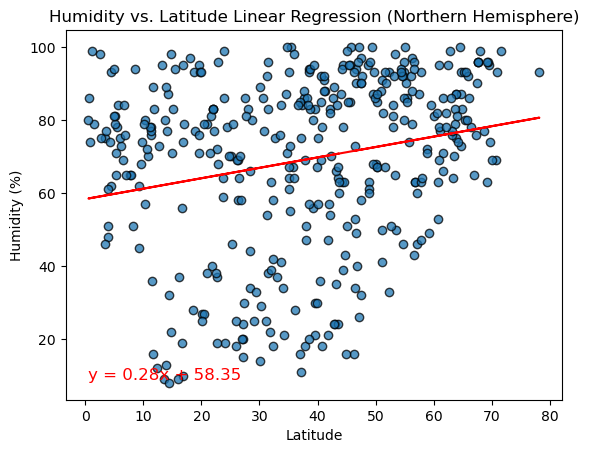

In [149]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Humidity vs. Latitude Linear Regression (Northern Hemisphere)"
)

The r-value is: 0.0070576370044961355


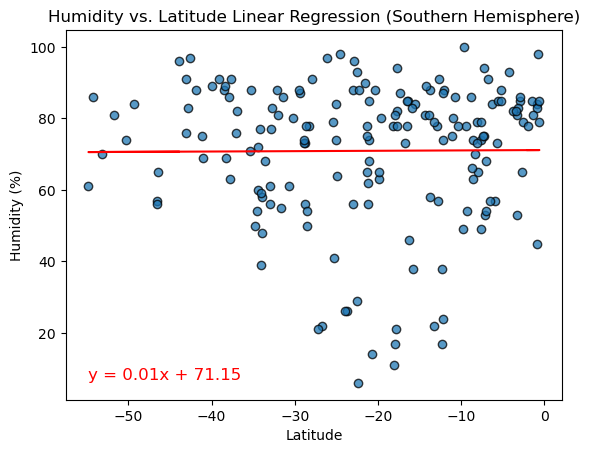

In [150]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],
    "Latitude",
    "Humidity (%)",
    "Humidity vs. Latitude Linear Regression (Southern Hemisphere)"
)

# Humidity vs. Latitude Linear Regression Plot Discussion

## Northern Hemisphere:
The R-value of 0.22 suggests a weak positive correlation between humidity and latitude in the Northern Hemisphere.
The linear regression formula, y = 0.28x + 58.35, indicates that there is a slight increase in humidity as you move north in the Northern Hemisphere. However, the effect is relatively weak, with a modest slope.

## Southern Hemisphere:
The R-value of 0.01 indicates an extremely weak positive correlation between humidity and latitude in the Southern Hemisphere.
The linear regression formula, y = 0.01x + 71.15, suggests a minimal increase in humidity as you move south in the Southern Hemisphere. The effect is almost negligible.

## Conclusion:
In both hemispheres, the R-values are relatively low, indicating that latitude alone has a limited impact on humidity. The correlations are weak, suggesting that other factors, such as regional climate patterns, proximity to bodies of water, and elevation, may have a more significant influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12115764148034891


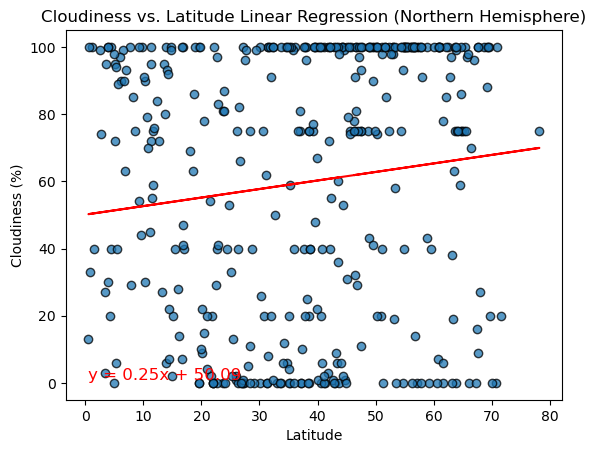

In [151]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)"
)

The r-value is: 0.28047966015100606


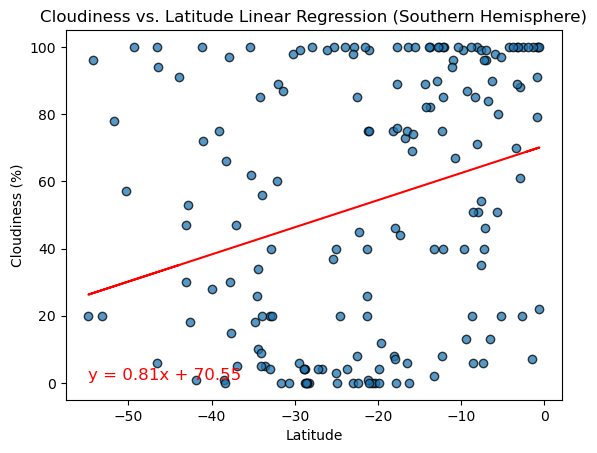

In [152]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],
    "Latitude",
    "Cloudiness (%)",
    "Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)"
)

# Cloudiness vs. Latitude Linear Regression Plot Discussion
## Northern Hemisphere:
The R-value of 0.12 suggests a very weak positive correlation between cloudiness and latitude in the Northern Hemisphere.
The linear regression formula, y = 0.25x + 50.09, indicates that cloudiness may slightly increase as you move north in the Northern Hemisphere. However, the slope is very small, suggesting a limited effect.
## Southern Hemisphere:
The R-value of 0.28 indicates a weak positive correlation between cloudiness and latitude in the Southern Hemisphere.
The linear regression formula, y = 0.81x + 70.55, suggests that cloudiness may increase as you move south in the Southern Hemisphere, but the effect is still relatively small.
## Conclusion:
In both hemispheres, the R-values are relatively low, indicating that latitude alone has a limited impact on cloudiness. These weak correlations suggest that other factors, such as regional climate patterns and geography, may have a more significant influence on cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08013223749987293


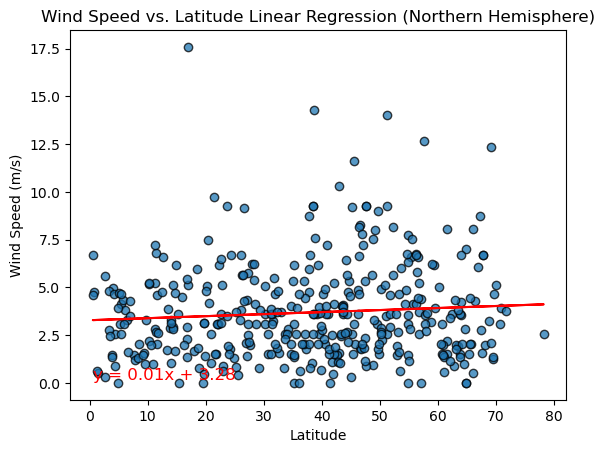

In [153]:
# Northern Hemisphere
create_linear_regression_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)"
)

The r-value is: -0.25567753666185056


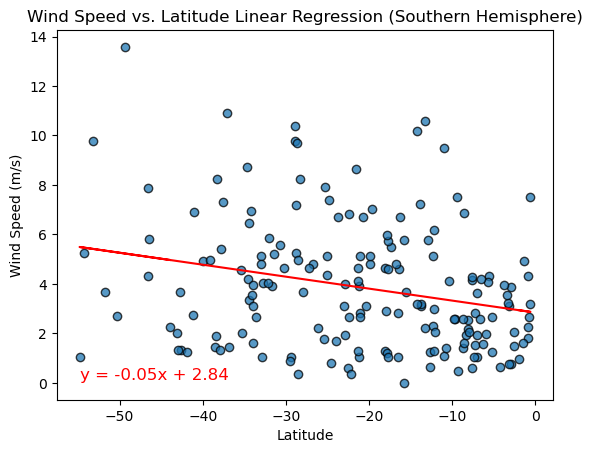

In [155]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],
    "Latitude",
    "Wind Speed (m/s)",
    "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)"
)

# Wind Speed vs. Latitude Linear Regression Plot Discussion
## Northern Hemisphere:
The R-value of 0.08 suggests a very weak positive correlation between wind speed and latitude in the Northern Hemisphere.
The linear regression formula, y = 0.01x + 3.28, indicates that wind speed tends to slightly increase as you move north in the Northern Hemisphere. However, the slope is very small, suggesting a limited effect.

## Southern Hemisphere:
The R-value of -0.26 indicates a very weak negative correlation between wind speed and latitude in the Southern Hemisphere.
The linear regression formula, y = -0.05x + 2.84, suggests that wind speed may slightly decrease as you move south in the Southern Hemisphere, but again, the effect is minimal.

## Conclusion:
In both hemispheres, the R-values are close to zero, indicating that latitude has a limited impact on wind speed. These weak correlations imply that latitude alone is not a strong predictor of wind speed, and other factors may have more significant influences on wind patterns. 